<a href="https://colab.research.google.com/github/fbourrin/Python/blob/main/TD3_Statistics_corrig%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importez les librairies Numby, Pandas et Matplotlib comme vous l'avez fait précédemment au TD1.

In [1]:
# à compléter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Chargement des données
Charger le fichier count.csv
Le fichier comporte 3 colonnes de 24 valeurs. Ce sont des données chiffrées de comptage de poissons heure par heure (les lignes) à trois localisations distinctes du Golfe du Lion (les colonnes) pour une seule journée.
Chargez vos données sous le dataframe df.

In [2]:
from google.colab import files # importer un fichier depuis colab
uploaded = files.upload() # choisir count.csv

Saving count.csv to count.csv


In [3]:
# à compléter
df = pd.read_csv('count.csv')
df

,E1,E2,E3
0,11,11,9
1,7,13,11
2,14,17,20
3,11,13,9
4,43,51,69
5,38,46,76
6,61,132,186
7,75,135,180
8,38,88,115
9,28,36,55


# 2.Vérification des données
Récupérer la 3e colonne de votre dataframe sous la variable E3.

In [4]:
# à compléter
E3 = df['E3']
E3

0       9
1      11
2      20
3       9
4      69
5      76
6     186
7     180
8     115
9      55
10     14
11     30
12     29
13     18
14     48
15     10
16     92
17    151
18     90
19    257
20     68
21     15
22     15
23      7
Name: E3, dtype: int64

Vérifiez que votre set de données ne comporte pas de valeurs manquantes (nan) avec la fonction isnan().

In [ ]:
# à compléter
np.isnan(E3)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
Name: E3, dtype: bool

# 3. Vérifications des valeurs aberrantes
Les valeurs aberrantes sont des valeurs radicalement différentes des tendances du reste des données. Elles peuvent provenir d’erreurs de mesure ou représenter
 des caractéristiques importantes des données. Il convient de comprendre les données et leur source pour identifier les valeurs aberrantes et décider comment les traiter. L'une des méthodes courantes d’identification des valeurs aberrantes consiste à rechercher des valeurs qui s’écartent de plus d’un certain nombre d’écarts-types σ de la moyenne μ.
Tracez un histogramme des valeurs E3 classées dans 10 classes avec la fonction hist.

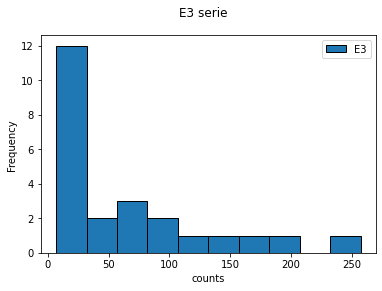

In [ ]:
# à compléter
ax = E3.plot.hist(bins=10,edgecolor='black')
plt.xlabel('counts')
plt.suptitle('E3 serie')
ax.legend(['E3'])

Calculez la moyenne et la déviation standard de votre set de données.

In [7]:
# à compléter
mu3 = np.mean(E3)
mu3
#df.E3.mean()

65.58333333333333

In [11]:
# à compléter
#std3 =np.std(E3)
std3
#df['E3'].std()
#np.std(E3)
#E3.std()
E3.std()


68.0280739149633

Tracer une ligne verticale sur votre histogramme correspondant à la moyenne avec la fonction axvline.
Rajoutez une ligne verticale pour μ+σ et μ+2σ

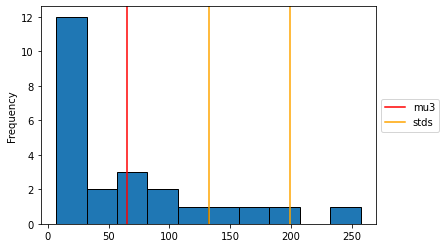

In [ ]:
# à compléter
ax = E3.plot.hist(bins=10,edgecolor='black')
plt.axvline(x = mu3, color = 'red', label = 'axvline - full height')
plt.axvline(x = mu3+std3, color = 'orange', label = 'axvline - full height')
plt.axvline(x = mu3+2*std3, color = 'orange', label = 'axvline - full height')
ax.legend(['mu3','stds'],loc='center left',bbox_to_anchor=(1,0.5))

% Ce tracé montre que certaines des données sont situées à plus de deux écarts-types au-dessus de la moyenne. Si vous identifiez ces données comme des erreurs (et non pas des caractéristiques), remplacez-les par des nan.

In [14]:
# à compléter
outliers = (E3 - mu3) > 2*std3
df['E3m']=E3
df.E3m[outliers]=np.nan
df


,E1,E2,E3,E3m
0,11,11,9,9.0
1,7,13,11,11.0
2,14,17,20,20.0
3,11,13,9,9.0
4,43,51,69,69.0
5,38,46,76,76.0
6,61,132,186,186.0
7,75,135,180,180.0
8,38,88,115,115.0
9,28,36,55,55.0


# 4.Lissage et filtrage des données
Un tracé en série chronologique des données à la troisième localisation (avec la valeur aberrante supprimée dans la section « Valeurs aberrantes ») permet de visualiser les données.
Tracez cette courbe.

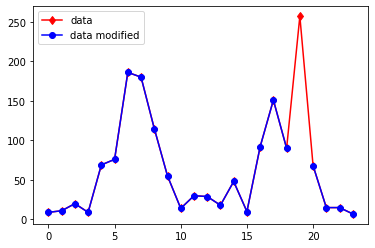

In [15]:
# à compléter
plt.plot(df.E3,'rd-',label='data')
plt.plot(df.E3m,'bo-',label='data modified')
plt.legend(loc="upper left")

La valeur NaN à l’heure 20 apparaît comme un trou dans le tracé. Ce traitement des valeurs NaN est typique des fonctions de tracé Python. Les données bruitées montrent des variations aléatoires par rapport aux valeurs attendues. Il peut s’avérer utile de lisser les données pour illustrer les principales caractéristiques avant de bâtir un modèle. Deux hypothèses de base sont à la base du lissage :
- La relation entre le prédicteur (heure) et la réponse (volume de circulation) est lisse.
- L'algorithme de lissage produit des valeurs qui constituent de meilleures estimations des valeurs attendues, car le bruit a été réduit.
Appliquez la méthode de lissage par moyenne mobile aux données en utilisant la fonction rolling().mean().
Utilisez une fenêtre de moyenne mobile de 3.

,E1,E2,E3,E3m,spans_avg
0,11,11,9,9.0,NaN
1,7,13,11,11.0,NaN
2,14,17,20,20.0,13.333333
3,11,13,9,9.0,13.333333
4,43,51,69,69.0,32.666667
5,38,46,76,76.0,51.333333
6,61,132,186,186.0,110.333333
7,75,135,180,180.0,147.333333
8,38,88,115,115.0,160.333333
9,28,36,55,55.0,116.666667


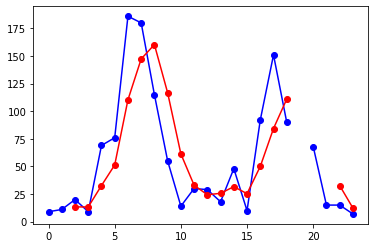

In [17]:
# à compléter
df['spans_avg']=df.E3m.rolling(window = 3).mean()
plt.plot(df.E3m,'bo-',df.spans_avg,'ro-')
df

L’étendue du lissage est contrôlée à l’aide de la variable window. Le calcul de la moyenne produit des valeurs NaN lorsque la fenêtre de lissage inclut la valeur NaN dans les données,
ce qui augmente la taille du trou dans les données lissées.
Utilisez la variable min_periods=1 dans votre fonction rolling(). Qu'observez-vous? rajoutez également la variable center=True. Qu'observez vous?
Tracez les courbes obtenues.


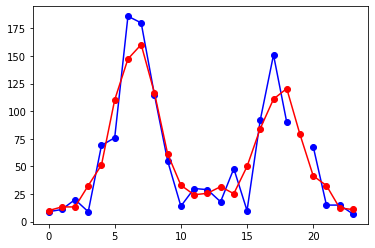

In [21]:
# à compléter
df['spans_avg']=df.E3m.rolling(window = 3,center=True,min_periods=1).mean()
plt.plot(df.E3m,'bo-',df.spans_avg,'ro-')
#df

Utilisez la fonction interpolate() pour interpoler les données au dessus des valeurs nan de manière linéaire. Tracez le résultat.

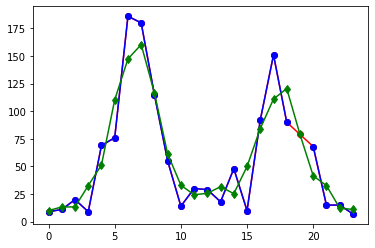

In [24]:
df['data_interp']=df.E3m.interpolate()
plt.plot(df.data_interp,'ro-',df.E3m,'bo-',df.spans_avg,'gd-')

In [27]:
df.E3.median()

39.0